# Data Preparation

## Count of Each Class/Character

It is expected/assumed that the dataset is not split. The below script will read the data from parent dataset directory and process accordingly.

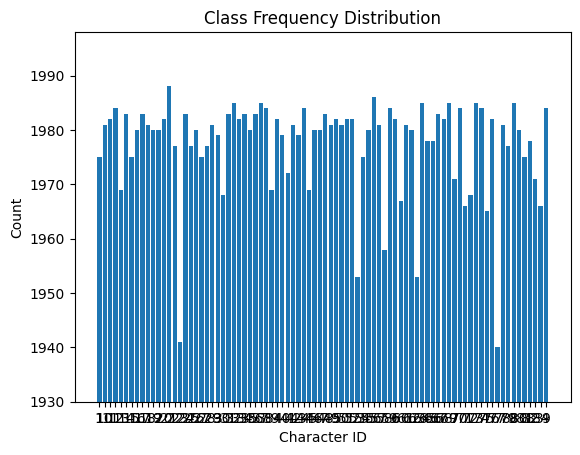

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import os, shutil

dataset_path = "D:\Bangla Character Data\BanglaLekha-Isolated\Images"

label_freq = defaultdict(int)
if os.path.exists(os.path.join(dataset_path)):
    classes = os.listdir(dataset_path)
    for i in classes :
        label_freq[i] = len(os.listdir(os.path.join(dataset_path, i)))
    plt.bar(label_freq.keys(), label_freq.values())
    plt.xlabel('Character ID')
    plt.ylabel('Count')
    plt.title('Class Frequency Distribution')
    plt.ylim(min(label_freq.values())-10, max(label_freq.values())+10)
    plt.plot()
else:
    print("Dataset folder missing")

#the output plot denotes the number of images present in each of the 84 classes

## Average, Maximum, Minimum Count

In [2]:
avg_img_per_class = sum(label_freq.values())/len(label_freq.values())
print(f"Average number of characters present per class = {avg_img_per_class:.4f}")

print("Number of Classes having less images than average =>", end=' ')
count = 0
for (i, v) in label_freq.items():
    if v <= avg_img_per_class:
        count +=1
print(f"{count}")

min_img = min(label_freq.values())
max_img = max(label_freq.values())
print(f"Maximum images a class has : {max_img}\nMinimum images a class has : {min_img}")


Average number of characters present per class = 1977.4405
Number of Classes having less images than average => 26
Maximum images a class has : 1988
Minimum images a class has : 1940


## Splitting into Train and Test

If the dataset is not split into **Train** and **Test**, then this snippet will do the job. [This Repo](https://www.kaggle.com/datasets/ayanwap7/banglalekhaisolated-train-test-split) on Kaggle comes with Train and Test Splits already performed.

In [3]:
classes = list(label_freq.keys())
train_size = min_img - 10

if not os.path.exists(os.path.join(dataset_path, 'train')):
    os.mkdir(os.path.join(dataset_path, 'train'))

    for i in classes :
        os.mkdir(os.path.join(dataset_path, 'train', i))

if not os.path.exists(os.path.join(dataset_path, 'test')):
    os.mkdir(os.path.join(dataset_path, 'test'))

    for i in classes :
        os.mkdir(os.path.join(dataset_path, 'test', i))

if len(os.listdir(os.path.join(dataset_path, 'train', classes[0])))==0 :
    for i in classes :
        all_images = os.listdir(os.path.join(dataset_path, i))

        for img in all_images[:train_size]:
            shutil.move(os.path.join(dataset_path, i, img), os.path.join(dataset_path, 'train', i, img))
        
        for img in all_images[train_size:]:
            shutil.move(os.path.join(dataset_path, i, img), os.path.join(dataset_path, 'test', i, img))
        
        if len(os.listdir(os.path.join(dataset_path, i)))==0:
            os.rmdir(os.path.join(dataset_path, i))

train_size = 0
test_size = 0
for i in classes :
    train_size += len(os.listdir(os.path.join(dataset_path, 'train', i)))
    test_size += len(os.listdir(os.path.join(dataset_path, 'test', i)))

print(f"Total Training samples = {train_size}\nTotal Validation/Test samples = {test_size}")

Total Training samples = 162120
Total Validation/Test samples = 3985


To handle the **Class Imbalance** problem, I have performed the above EDA and put **equal number of samples** from each class in the Train Split. This means we have undersampled the majority class and oversampled the minority class in the training set to properly assess the generalization performance. The rest of the samples from each class is kept in the Validation/Test split. You can see the output of the below cell to get the numbers.

TRAIN :
Maximum number of items in a class = 1930
Minimum number of items in a class = 1930

VALIDATION/TEST :
Maximum number of items in a class = 58
Minimum number of items in a class = 10


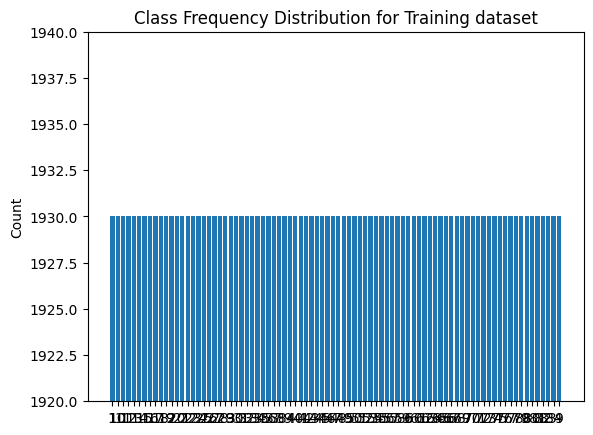

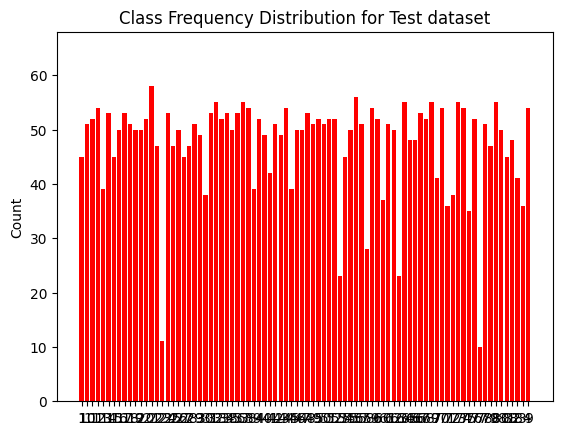

In [5]:
train_dict = defaultdict(int)
test_dict = defaultdict(int)

if os.path.exists(os.path.join(dataset_path, 'train')):
    classes = os.listdir(os.path.join(dataset_path, 'train'))
    for i in classes :
        train_dict[i] = len(os.listdir(os.path.join(dataset_path, 'train', i)))
        test_dict[i] = len(os.listdir(os.path.join(dataset_path, 'test', i)))

print(f"TRAIN :\nMaximum number of items in a class = {max(train_dict.values())}\nMinimum number of items in a class = {min(train_dict.values())}")
print(f"\nVALIDATION/TEST :\nMaximum number of items in a class = {max(test_dict.values())}\nMinimum number of items in a class = {min(test_dict.values())}")

plt.bar(train_dict.keys(), train_dict.values())
#plt.xlabel('Character ID')
plt.ylabel('Count')
plt.title('Class Frequency Distribution for Training dataset')
plt.ylim(min(train_dict.values())-10, max(train_dict.values())+10)
plt.show()

plt.bar(test_dict.keys(), test_dict.values(), color='red')
#plt.xlabel('Character ID')
plt.ylabel('Count')
plt.title('Class Frequency Distribution for Test dataset')
plt.ylim(min(test_dict.values())-10, max(test_dict.values())+10)
plt.show()

## Random Image Visualization

Actual Image size = (125, 125)


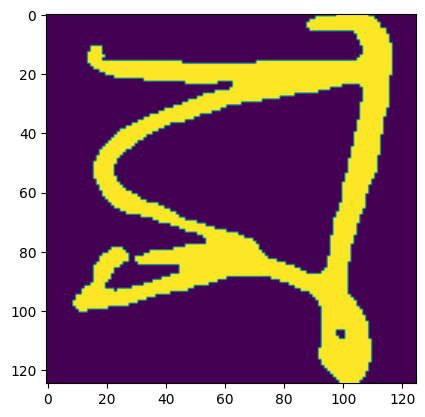

In [8]:
from PIL import Image

random_index_class = str(np.random.randint(1, 84))
all_images = os.listdir(os.path.join(dataset_path, 'train', random_index_class))

random_index_image = np.random.randint(1, len(all_images))
a = Image.open(os.path.join(dataset_path, 'train', random_index_class, all_images[random_index_image]))
plt.imshow(np.asarray(a))

print(f"Actual Image size = {a.size}")

## Resizing Images
Run this cell again ONLY if you wish to resize the images. Else DON'T RUN.

The Height and Width of all the images in this dataset is less than 224. Therefore, for compatibility, we need to pad and resize the images.

In [9]:
# Execution time = 8m 13.6s
import torchvision.transforms.functional as TF
import math

def resize(img, size):
    left = math.ceil((size - img.size[0])/2)
    top = math.floor((size - img.size[1])/2)
    right = math.floor((size - img.size[0])/2)
    bottom = math.ceil((size - img.size[1])/2)
    resized = TF.pad(img, (left, top, right, bottom))
    return resized

target = 224

for split in ['train', 'test']:
    for label in classes :
        all_images = os.listdir(os.path.join(dataset_path, split, label))
        for image in all_images :
            img = Image.open(os.path.join(dataset_path, split, label, image))
            resized = resize(img, target)
            resized.save(os.path.join(dataset_path, split, label, image))

# Reverse Split

If the dataset is split before and you wish to split the data again, this snippet will populate all the images from the split folders into parent folder again.

In [1]:
import os, shutil

dataset_path = "./BanglaLekha_Dataset"

classes = os.listdir(os.path.join(dataset_path, 'train'))
for cl in classes:
    os.mkdir(os.path.join(dataset_path, cl))

for split in ['train', 'test']:
    for cl in classes:
        images = os.listdir(os.path.join(dataset_path, split, cl))
        for img in images:
            shutil.move(os.path.join(dataset_path, split, cl, img), os.path.join(dataset_path, cl, img))
        if len(os.listdir(os.path.join(dataset_path, split, cl))) == 0:
            shutil.rmtree(os.path.join(dataset_path, split, cl))

    if len(os.listdir(os.path.join(dataset_path, split))) == 0:
        shutil.rmtree(os.path.join(dataset_path, split))